<a href="https://colab.research.google.com/github/K4cp3rski/ML_FUW/blob/master/Cybi%C5%84ski_Praca_domowa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rozpoznawanie obrazu na potrzeby eksperymentu naukowego

Pi of the Sky (https://www.pi.fuw.edu.pl/jest) jest eksperymentem astrofizycznym, którego głównym celem jest poszukiwanie rozbłysków gamma (GRB) (https://pl.wikipedia.org/wiki/Rozbłysk_gamma). W tym celu zautomatyzowane teleskopy w Chile i Hiszpanii fotografują niebo w poszukiwaniu interesujących zdarzeń. Klasyczne algorytmy wykrywania rozbłysków gamma działają w następujący sposób: wybrany obszar nieba jest stale fotografowany w pewnych odstępach czasu, jeżeli skanowany obszar zmieni się w jakiś sposób, może to oznaczać, iż pojawiło się nowe źródło promieniowania, dlatego kilka(naście) klatek (zdjęć) przed i po wystąpieniu zjawiska jest zachowywanych do późniejszej analizy. Naukowcy analizują sekwencję zdjęć aby stwierdzić, czy faktycznie zaobserwowano rozbłysk gamma. Niestety, wiele spośród zebranych danych to fałszywe alarmy, wywołane np. przez chmury poruszające się na niebie. Celem niniejszego ćwiczenia jest stworzenie algorytmu uczenia maszynowego opartego o konwolucyjne sieci neuronowe, który mógłby usprawnić analizę poprzez odsiewanie niepoprawnych danych, oszczędzając pracy naukowcom.

W zadaniu chcemy stworzyć tzw. "proof of concept", czyli rozwiązanie dalekie od ostatecznego, ale pokazujące, że problem może potencjalnie zostać rozwiązany z użyciem zaproponowanej metody. Ograniczymy się do analizy pojedynczych obrazów a nie całych sekwencji. Chcemy dokonać klasyfikacji obrazów należących do trzech klas:

0) zdjęcia potencjalnie zawierające rozbłyski gamma 

1) fałszywe alarmy przedstawiające niebo z chmurami

2) fałszywe alarmy zawierające artefakty spowodowane wadliwą pracą aparatury badawczej (poziome/pionowe linie)

 ## Polecenia


#### Uwaga ogólna: Wszystkie wykresy i obrazki w notatniku mają być estetyczne, zawierać podpisy osi, tytuły, legendy itp. Wypisując jakieś wartości należy napisać również czym one są. Przed wysłaniem rozwiązania należy usunąć wszystkie niepotrzebne komentarze i komórki. Mile widziane są opisy/komentarze wyjaśniające co w danej komórce próbujecie zrobić.

1. Wczytanie i wstępna obróbka danych
     * Proszę pobrać archiwum "data.zip":
     https://github.com/Rav2/uczenie-maszynowe-2021-22/raw/main/praca_domowa/data.zip
     * Archiwum należy rozpakować. Folder "data" zawiera trzy podfoldery odpowiadające trzem klasom: "0", "1" oraz "2", które zawierają obrazki w formacie JPG. Wszystkie obrazki mają identyczne wymiary. Jeśli chcecie pracować w Google Collab, to polecam przesłać obrazki na dysk Google i podłączyć ten dysk do notebooka (instrukcja niżej).
     * Proszę wczytać obrazki, np. korzystając z funkcji
     tensorflow.keras.preprocessing.image.load_img (patrz przykład poniżej) i stworzyć tensor cech X i wektor etykiet y.
     * Tensor cech powinnien mieć wymiar (3573, 100, 100, 1). 1 odpowiada pojedynczemu kanałowi (czarno-biały obraz). Jeżeli dane nie mają takiego kształtu to proszę im go nadać.
     * Proszę sprawdzić i wyświetlić liczebność klas.
     * Proszę sprawdzić i wyświetlić wymiary obrazka (w pikselach) i zapisać do zmiennych. Przydadzą się później.
     * Proszę wyświetlić po jednym obrazku z każdej klasy wraz z numerem klasy.
2. Preprocessing
     * Proszę przeskalować wartości pikseli tak, żeby były w przedziale [0,1].
     * Proszę podzielić dane na zbiory uczący (70%) i testowy (30%).
     * Proszę sprawdzić, czy rozkład klas w obu zbiorach jest zbliżony. Jeżeli nie jest, to proszę dokonać podziału danych tak, żeby był.
3. Uczenie sieci
    * Proszę zaproponować architekturę sieci opartą o warstwy CNN. Proszę wykorzystać również pooling oraz dropout i pamiętać o spłaszczeniu na końcu. Sieć ma przyjmować obrazki w oryginalnych rozmiarach. Proszę pamiętać o właściwej funkcji aktywacji w ostatniej warstwie.
    * Proszę wytrenować sieć wydzielając ze zbioru uczącego 15% na walidację.
    * Proszę narysować wykresy accuracy i funkcji kosztu w funkcji numeru epoki (iteracji) uczenia, zarówno dla zbioru uczącego jak i walidacyjnego.
4. Ewaluacja
    * Proszę dokonać predykcji na zbiorze testowym.
    * Proszę wypisać raport z klasyfikacji i macierz pomyłek. W przypadku otrzymania mniej niż 80% accuracy proszę porawić architekturę i parametry sieci.
    * Proszę policzyć procent poprawnie sklasyfikowanych obrazków dla każdej z klas i przedstawić na histogramie.
    * Proszę narysować wykres ROC i podać pole wykresu pod krzywą. 
5. Generacja pseudodanych
  * Proszę zapoznać się z dokumentacją klasy tensorflow.keras.preprocessing.image.ImageDataGenerator oraz przykładami użycia.
  * Proszę stworzyć obiekt typu ImageDataGenerator z parametrami pozwalającymi na generację pseudodanych poprzez użycie:
    a) przesunięcia o nie wiecej niż 20 pikseli
    b) odbicia względem osi OX lub OY
    c) zoom do 10%
  * Proszę przeznaczyć 15% zbioru treningowego na zbiór walidacyjny.
  * Korzystając z metody "flow" dla obiektu typu ImageDataGenerator proszę wytrenować sieć neuronową.
  * Proszę przeprowadzić ponowną ewaluację sieci wytrenowanej z generacją pseudodanych.
  *Proszę porównać wyniki z wcześniejszymi i napisać kilka zdań komentarza z wyjaśnieniem obecności lub braku różnic.

6. Dodatkowe (dla chętnych)
    * Znaleźć optymalne wartości hiperparametrów sieci w sposób automatyczny, wykorzystując jedną z dostępnych bibliotek lub implementując samemu, np. z użyciem zagnieżdżonych pętli for.
    * Dla znalezionych parametrów wykonać uczenie i ewaluację. Porównać z wcześniejszymi wynikami.

#### Pobranie danych i rozpakowanie

In [1]:
import time
start_time = time.time()

In [2]:
# Odkomentuj i wykonaj, żeby pobrać dane i rozpakować
# ! wget https://github.com/Rav2/uczenie-maszynowe-2021-22/raw/main/praca_domowa/data.zip
# ! unzip -q data.zip

 #### Podpięcie dysku Google do notebooka (po tym wszystkie pliki na dysku będą dostępne, trzeba zatwierdzić w wyskakujących okienkach)

In [3]:
# # Jeżeli chcesz/potrzebujesz udostępnić swój dysk Google notatnikowi z Collaba to możesz to zrobić następująco.
# # Odkomentuj i wykonaj, żeby podłączyć swój dysk Google do notatnika
# # Pliki będą dostępne pod ścieżką /content/drive/...

# from google.colab import drive
# drive.mount('/content/drive')

# Rozwiązanie

Najpierw szykujemy komórkę z techincznymi importami, bez których nie mamy podjazdu do rozwiązania zadania

In [4]:
import sys, os

from termcolor import colored
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

seed = 128
rng = np.random.RandomState(seed)

*A teraz importy z TensorFlow i Kerasa*  
(lokalnie mi czasem zabijały kernel i dlatego są osobno)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import np_utils

### Teraz sobie zaimportujemy nasz folder w tensor

In [6]:
import pathlib

# Pobieranie zbioru danych do folderu z cache
dataset_url = "https://github.com/Rav2/uczenie-maszynowe-2021-22/raw/main/praca_domowa/data.zip"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname="data.zip",
                                   extract=True)
data_dir = pathlib.Path(data_dir)
# Pozbywamy się zipa po wypakownaniu
os.system(f"rm {data_dir}")
data_dir = data_dir.parent.joinpath("data")

14065664/14050616 [==============================] - 1s 0us/step


In [7]:
# Sprawdzamy, czy załadowały się wszystkie interesujace nas katalogi (klasy)
[x for x in data_dir.iterdir() if x.is_dir()]

[PosixPath('/Users/k4cp3rskiii/.keras/datasets/data/0'),
 PosixPath('/Users/k4cp3rskiii/.keras/datasets/data/1'),
 PosixPath('/Users/k4cp3rskiii/.keras/datasets/data/2')]

Sprawdzamy ile jest obrazków w naszym zbiorze danych

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3573


#### Pokazujemy przykładowy obrazek i zapisujemy jego rozmiary

(100, 100)


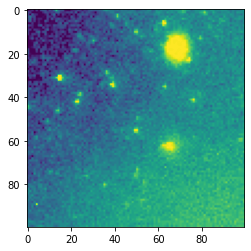

In [9]:
# Ustal pełną ścieżkę do pliku nr 5
path = data_dir.joinpath(list(data_dir.glob('1/*.jpg'))[0])
 
# Wczytaj obrazek
img = load_img(path, color_mode='grayscale')
 
# Przekonwertuj do tablicy w numpy
img_arr = np.asarray(img)

plt.imshow(img_arr)
print(img_arr.shape)

In [10]:
#  Deklarujemy niezbędne parametry
batch_size = image_count    # To jest w tym celu, by załadowany później dataset składał się tylko z jednego batcha, 
                            # w ten sposób łatwiejsza była implementacja sieci.
# Zgodnie z poleceniem zapisujemy wymiary obrazka. Przeskalujemy do nich input naszej sieci neuronowej.
img_height = img_arr.shape[0]
img_width = img_arr.shape[1]

In [11]:
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    label_mode = 'categorical',
    batch_size=batch_size)

Found 3573 files belonging to 3 classes.
Metal device set to: Apple M1


2022-02-06 23:25:31.473325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-06 23:25:31.473440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
#  Konwertujemy strukturę datasetu do tensora
for images, labels in ds.take(1):  
    extracted_images = images
    extracted_labels = labels

2022-02-06 23:25:31.543685: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Weryfikujemy - Faktycznie nasz tensor ma kształt który chcieliśmy, tj. [3573, 100, 100, 1]

In [13]:
extracted_images.shape

TensorShape([3573, 100, 100, 1])

Sprawdzamy, czy zaimportowane klasy są odpowiednio nazwane tak, jakbyśmy chcieli

In [14]:
ds.class_names

['0', '1', '2']

Konwertujemy strukturę datasetu do pandas df, bo ją łatwiej wizualizować, np za pomocą seborna. 
Każdy wiersz to spłaszczony obrazek w postaci arraya (100\*100, 1)

In [15]:
ex_im = pd.DataFrame(extracted_images.numpy().reshape(-1,10000))
ex_im["Labels"] = np.argmax(extracted_labels, axis=1)
ex_im.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Labels
0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,4.0,0.0,2.0,...,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0
1,18.0,27.0,0.0,0.0,29.0,58.0,0.0,61.0,35.0,0.0,...,0.0,11.0,24.0,49.0,0.0,83.0,0.0,15.0,70.0,1
2,230.0,242.0,235.0,232.0,237.0,224.0,226.0,213.0,209.0,220.0,...,61.0,58.0,56.0,85.0,43.0,62.0,44.0,79.0,48.0,1
3,15.0,22.0,11.0,13.0,11.0,18.0,17.0,6.0,14.0,11.0,...,15.0,2.0,14.0,8.0,11.0,10.0,10.0,10.0,12.0,2
4,7.0,4.0,2.0,4.0,4.0,4.0,6.0,10.0,11.0,6.0,...,4.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,0


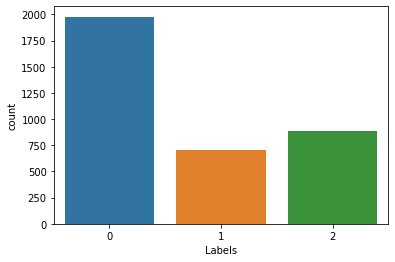

In [16]:
ax = sns.countplot(x="Labels", data=ex_im)

(-0.5, 99.5, 99.5, -0.5)

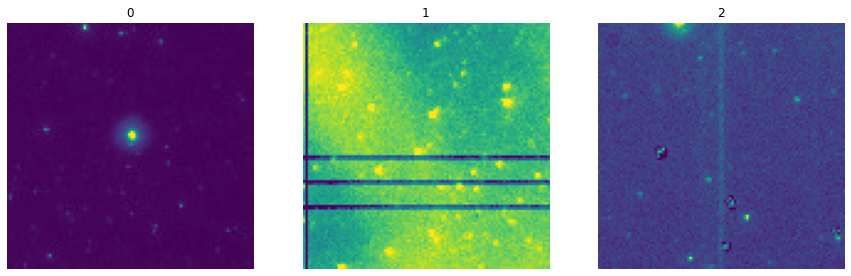

In [17]:
plt.figure(figsize=(15, 9))

ax = plt.subplot(1, 3, 1)
im_0 = ex_im[ex_im["Labels"] == 0].drop("Labels", axis=1).to_numpy()[0].reshape(100, 100)
plt.imshow(im_0)
plt.title("0")
plt.axis("off")

ax = plt.subplot(1, 3, 2)
im_1 = ex_im[ex_im["Labels"] == 1].drop("Labels", axis=1).to_numpy()[11].reshape(100, 100)
plt.imshow(im_1)
plt.title("1")
plt.axis("off")

ax = plt.subplot(1, 3, 3)
im_2 = ex_im[ex_im["Labels"] == 2].drop("Labels", axis=1).to_numpy()[4].reshape(100, 100)
plt.imshow(im_2)
plt.title("2")
plt.axis("off")

*Spostrzeżenie* Patrząc na wybranych reprezentantów klasy 1 lub 2 można zauważyć, że istnieje pewne niezerowe przekrycie między tymi klasami. To mogło by być podstawą do podjęcia decyzji o złączeniu tych dwóch klas razem, wtedy też mielibyśmy bardziej zbalansowany dataset.

In [18]:
# Funkcja wzięta z https://stackoverflow.com/a/63493396
# Train_test_split zaadaptowane do tensorów z TensorFlow

def train_test_split_tensors(X, y, **options):
    """
    encapsulation for the sklearn.model_selection.train_test_split function
    in order to split tensors objects and return tensors as output

    :param X: tensorflow.Tensor object
    :param y: tensorflow.Tensor object
    :dict **options: typical sklearn options are available, such as test_size and train_size
    """

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), **options)

    X_train, X_test = tf.constant(X_train), tf.constant(X_test)
    y_train, y_test = tf.constant(y_train), tf.constant(y_test)

    del(train_test_split)

    return X_train, X_test, y_train, y_test

#### Tutaj dzielimy zbiór na dane testowe i treningowe

Jest to robione metodą stratified, by zachować propocje klas (bo nie ma zabójczej dysproporcji klas)

In [19]:
train_set, test_set, train_labels, test_labels = train_test_split_tensors(images, labels, test_size=0.3, shuffle=True, stratify=labels)

## Sekcja funkcji pomocniczych

In [20]:
def plotTrainingHistory(model):

    history = model.history
    epochs_num = len(history['accuracy'])
    epoch_range = np.linspace(1, epochs_num, num=epochs_num)
    fig, axes= plt.subplots(1,2,figsize=(10,5))
    axes[0].plot(epoch_range, history['loss'], color='cyan')
    axes[0].plot(epoch_range, history['val_loss'], color='orange')
    axes[0].set_ylabel('Loss function value')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['train', 'validation'], loc='upper right')

    axes[1].plot(epoch_range, history['accuracy'], color='cyan')
    axes[1].plot(epoch_range, history['val_accuracy'], color='orange')
    axes[1].set_ylabel('Accuracy score')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['train', 'validation'], loc='lower right')

    fig.show()

In [21]:
def printScores(model, X, Y):
    y_pred = model.predict(X)
    y_true = Y

    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_true, axis=1)


    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    

In [22]:
def getScores(model, X, Y):
    y_pred = model.predict(X)
    y_true = Y

    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_true, axis=1)
    matrix = confusion_matrix(y_true, y_pred)

    return pd.DataFrame(matrix)

    

In [34]:
def plotHistScores(model, test_set,  test_labels):
    data = getScores(model, test_set,  test_labels)
    proc_0 = data[0].to_numpy()[0] / data[0].to_numpy().sum() * 100
    print(proc_0)
    
    proc_1 = data[1].to_numpy()[1] / data[1].to_numpy().sum() * 100
    print(proc_1)
    
    proc_2 = data[2].to_numpy()[2] / data[2].to_numpy().sum() * 100
    print(proc_2)
    
    fig, ax = plt.subplots()
    
    ax.bar([0, 1, 2] , [proc_0, proc_1, proc_2], width=0.1, tick_label=["Cat.0", "Cat.1", "Cat.2"], color=['cyan', 'red', 'green'])
    ax.set_title("Procent poprawnie sklasyfikowanych obrazków")
    ax.grid()
    ax.set_yticks(np.arange(0, 100, 10))
    
    fig.tight_layout()
    plt.show()

In [24]:
# Code adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle

def roc_auc(model, X, Y, title=None):
    if title is None:
        title = "A multiclass ROC characteristic"
    y_score = model.predict(X)
    y_test = Y.numpy()
    n_classes = Y[0].shape[0]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig = plt.figure(figsize=(15, 9))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )
    lw = 2
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )
        
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    return fig

## Definicja struktury modelu

In [25]:
def getModelWithRegularisation(nFilters, kernel_size, pool_size, nNeurons, nHiddenLayers, dropout_rate, l2_lambda, inputShape, outputWidth):
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    x = (tf.keras.layers.Rescaling(1./255))(x)
    for iHidden in range(nHiddenLayers):  
        x = tf.keras.layers.Conv2D(filters=nFilters, kernel_size=kernel_size, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(x)
#         x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.activations.relu(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size)(x)
        
        

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(nNeurons, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### Parametry trenowanego modelu

In [26]:
verb=1
dropout_rate = 0.2
l2_lambda = 0.001
epochs = 15
batch_size = 128
nFilters = 32
kernel_size = 3
pool_size = (2,2)
nNeurons = 128 
nHiddenLayers = 1 
inputShape = (100, 100, 1)
outputWidth = 3

In [27]:
%%time

model_primo = getModelWithRegularisation(nFilters, kernel_size, pool_size, nNeurons, nHiddenLayers, dropout_rate, l2_lambda, inputShape, outputWidth)

model_primo_fit = model_primo.fit(train_set, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_set, test_labels), verbose=verb, use_multiprocessing=True, validation_split=0.15, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)])



Epoch 1/15


2022-02-06 23:25:32.736982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - ETA: 0s - loss: 1.3699 - accuracy: 0.6584

2022-02-06 23:25:36.378565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 4s 216ms/step - loss: 1.3699 - accuracy: 0.6584 - val_loss: 0.6737 - val_accuracy: 0.8431
Epoch 2/15
17/17 [==============================] - 4s 209ms/step - loss: 0.6274 - accuracy: 0.8499 - val_loss: 0.5204 - val_accuracy: 0.8883
Epoch 3/15
17/17 [==============================] - 3s 205ms/step - loss: 0.4657 - accuracy: 0.9082 - val_loss: 0.4294 - val_accuracy: 0.9441
Epoch 4/15
17/17 [==============================] - 3s 200ms/step - loss: 0.3665 - accuracy: 0.9478 - val_loss: 0.3445 - val_accuracy: 0.9415
Epoch 5/15
17/17 [==============================] - 3s 204ms/step - loss: 0.2965 - accuracy: 0.9666 - val_loss: 0.3053 - val_accuracy: 0.9787
Epoch 6/15
17/17 [==============================] - 3s 200ms/step - loss: 0.2556 - accuracy: 0.9788 - val_loss: 0.2649 - val_accuracy: 0.9601
Epoch 7/15
17/17 [==============================] - 3s 205ms/step - loss: 0.2232 - accuracy: 0.9831 - val_loss: 0.2515 - val_accuracy: 0.9814
Epoch 8/15
17/17 

/var/folders/4f/nc8733x97cnbfw1jfx_t9mfm0000gn/T/ipykernel_33337/1127479491.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
2022-02-06 23:26:08.183189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       593
           1       0.97      0.99      0.98       212
           2       0.84      0.97      0.90       267

    accuracy                           0.95      1072
   macro avg       0.94      0.96      0.95      1072
weighted avg       0.95      0.95      0.95      1072

[[546   0  47]
 [  0 210   2]
 [  0   7 260]]


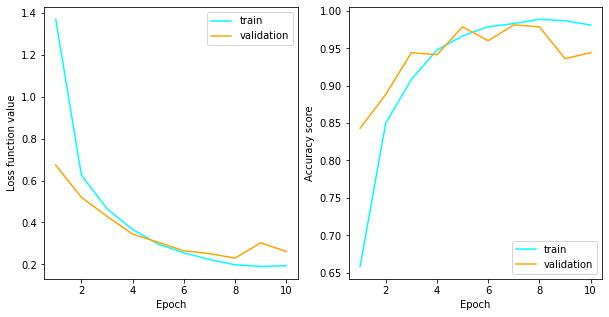

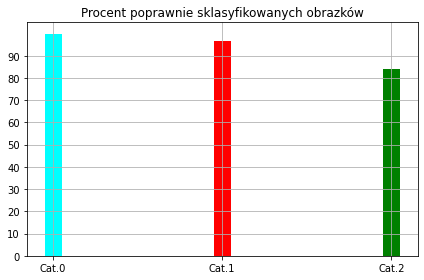

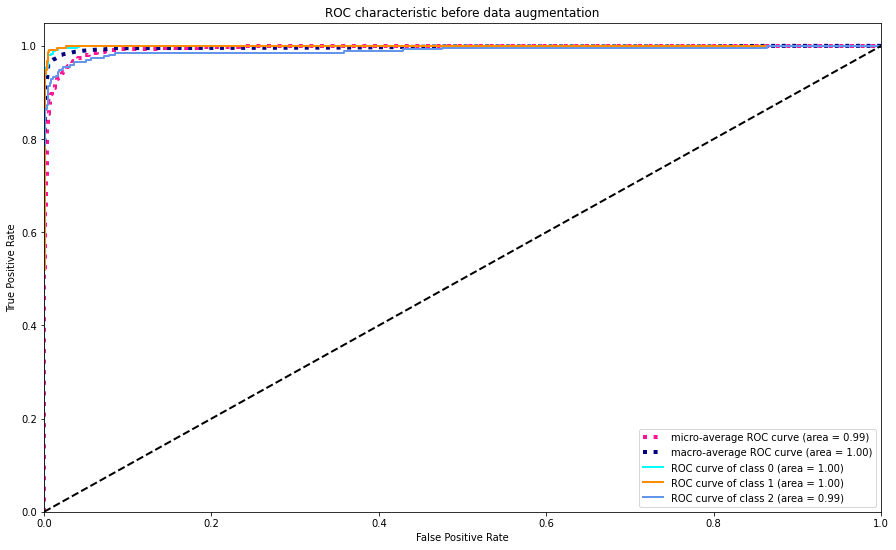

In [28]:
plotTrainingHistory(model_primo_fit) 
printScores(model_primo, test_set,  test_labels)
plotHistScores(model_primo, test_set,  test_labels)
ROC_1 = roc_auc(model_primo, test_set,  test_labels, title="ROC characteristic before data augmentation")

Jak widać otrzymaliśmy bardzo satysfakcjonujący klasyfikator, o recallu powyżej 94% i o AUC rzędu 0.98-1.00, więc mógłby być realnie wykorzystywany do opisanego we wstępie celu


### Teraz zajmimemy się generacją danych

a.k.a. zepsujmy sobie performance modelu próbując teoretycznie poprawić generalizację

In [29]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=20,
    height_shift_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    validation_split=0.2)

Ponowny trening naszego modelu na augmentowanych danych

In [30]:
%%time

epochs = 15


model_segundo = getModelWithRegularisation(nFilters, kernel_size, pool_size, nNeurons, nHiddenLayers, dropout_rate, l2_lambda, inputShape, outputWidth)

model_segundo_fit = model_segundo.fit(datagen.flow(train_set, train_labels, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(train_set, train_labels,
         batch_size=8, subset='validation'), epochs=epochs, verbose=verb, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)])

/Users/k4cp3rskiii/miniforge3/envs/ML/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/k4cp3rskiii/miniforge3/envs/ML/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15


2022-02-06 23:26:16.074675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.8465 - accuracy: 0.7571

2022-02-06 23:26:22.770760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 7s 112ms/step - loss: 0.8465 - accuracy: 0.7571 - val_loss: 0.6225 - val_accuracy: 0.8000
Epoch 2/15
63/63 [==============================] - 7s 110ms/step - loss: 0.5568 - accuracy: 0.8256 - val_loss: 0.6006 - val_accuracy: 0.7760
Epoch 3/15
63/63 [==============================] - 7s 110ms/step - loss: 0.5287 - accuracy: 0.8266 - val_loss: 0.5151 - val_accuracy: 0.8160
Epoch 4/15
63/63 [==============================] - 7s 109ms/step - loss: 0.4585 - accuracy: 0.8396 - val_loss: 0.4709 - val_accuracy: 0.8200
Epoch 5/15
63/63 [==============================] - 7s 109ms/step - loss: 0.4481 - accuracy: 0.8421 - val_loss: 0.4562 - val_accuracy: 0.8300
Epoch 6/15
63/63 [==============================] - 7s 110ms/step - loss: 0.4452 - accuracy: 0.8491 - val_loss: 0.4469 - val_accuracy: 0.8600
Epoch 7/15
63/63 [==============================] - 7s 110ms/step - loss: 0.4336 - accuracy: 0.8541 - val_loss: 0.4304 - val_accuracy: 0.8480
Epoch 8/15
63/63 

/var/folders/4f/nc8733x97cnbfw1jfx_t9mfm0000gn/T/ipykernel_33337/1127479491.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


              precision    recall  f1-score   support

           0       0.78      1.00      0.87       593
           1       0.97      0.98      0.97       212
           2       0.93      0.35      0.51       267

    accuracy                           0.83      1072
   macro avg       0.89      0.77      0.78      1072
weighted avg       0.85      0.83      0.80      1072

[[591   0   2]
 [  0 207   5]
 [167   7  93]]
77.9683377308707
96.72897196261682
93.0


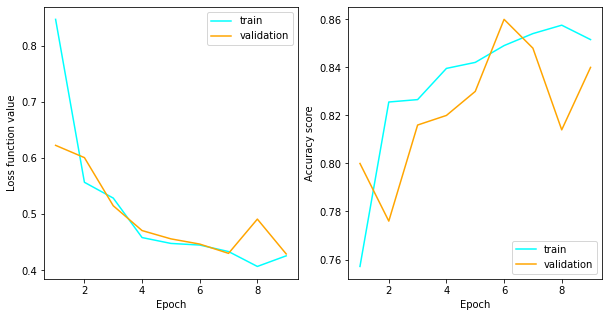

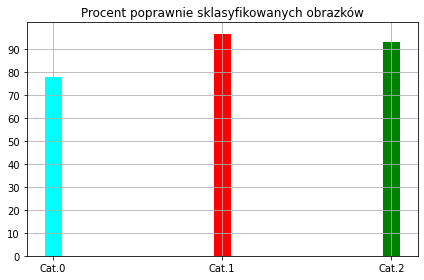

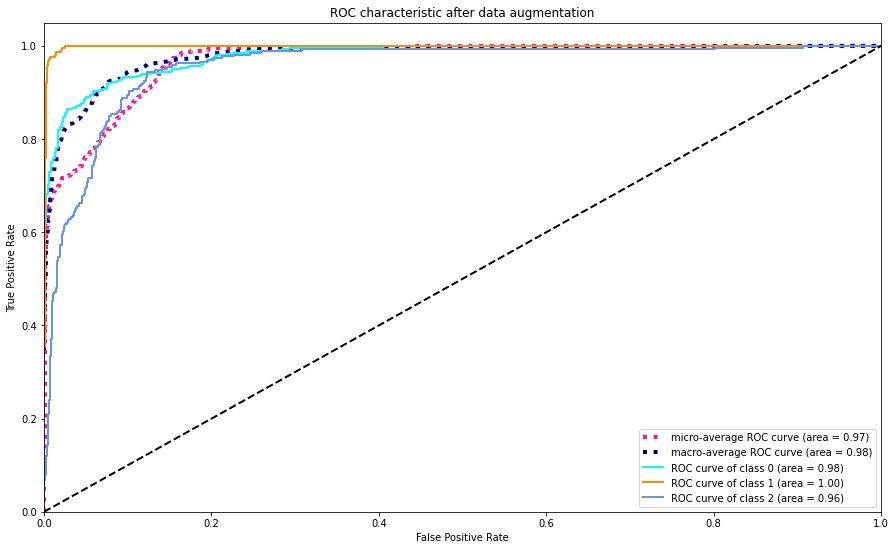

In [35]:
plotTrainingHistory(model_segundo_fit)

printScores(model_segundo, test_set,  test_labels)

plotHistScores(model_segundo, test_set,  test_labels)

ROC_2 = roc_auc(model_segundo, test_set,  test_labels, title="ROC characteristic after data augmentation")

In [32]:
print("Elapsed time\n--- %s seconds ---" % (time.time() - start_time))

Elapsed time
--- 120.89528131484985 seconds ---


#### Konkluzje
Jak widać na obrazku po treningu sieci na podstawowym zbiorze danych, nasz klasyfikator całkiem dobrze uczy się rozpoznawać obrazki z datasetu i całkiem nieźle się generalizuje (precyzja na zbiorze testowym jest wyższa niż na zbiorze treningowym), dostajemy recall i uśrednioną precyzję $\geq 94$%, więc spokojnie można to uznać jako proof of concept, co było celem projektu.  
  
Następnie dodano obiekt ImageDataGenerator, który aplikował przesunięcia do 20 px, oraz zoom do 10%, co sprawiło, że przy obecnej strukturze sieci nasz klasyfikator zaczał sobie zauważalnie gorzej radzić. Jest tak ponieważ choć dla klas 1 i 2 precyzja klasyfikacji jest wciąż wysoka, to dla klasy 0 spada do $\sim$75%, i skutkuje to tym, że $\sim$80% zdjęć klasyfikowanych błędne (klasa 2) to tak na prawdę zdjęcia dobre, plus istnieje ryzyko, że model jest lekko overfittowany, ponieważ metryki dla zbioru uczącego są lepsze jak dla walidacyjnego. Uśredniona precyzja nam wtedy też spada do $\sim$85-90% co jest wciąż używalne, ale nie jest już aż tak dobre jak wyniki na pierwotnym zbiorze.]

Podsumowując, klasyfikator działa bardzo ładnie na danych podstawowych, ale po ich zmodyfikowaniu się trochę psuje. Potencjalne sposoby na niwelowanie tego efektu:
- Zmiana architektury modelu
- Poszukanie lepszych hiperparametrów (l2, dropout rate)

**Dziękuję za uwagę :)**  
Kacper Cybiński

P.S. Można mnie też znaleźć na [GitHubie](https://github.com/K4cp3rski), gdzie można też znaleźć [tego notebooka](https://github.com/K4cp3rski/ML_FUW/blob/master/Cybiński_Praca_domowa_3.ipynb)